In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [5]:
jpeg_cha = pd.read_csv("../measurements/jpeg/characteristic.csv")
decom_cha = pd.read_csv("../measurements/decomposition/characteristic.csv")
reg_cha = pd.read_csv("../measurements/regression/characteristic.csv")
sketch_cha = pd.read_csv("../measurements/sketchml/characteristic.csv")

jpeg_cha = jpeg_cha[jpeg_cha["sparsity"]>0]
decom_cha = decom_cha[decom_cha["sparsity"]>0]
reg_cha = reg_cha[reg_cha["sparsity"]>0]
sketch_cha = sketch_cha[sketch_cha["sparsity"]>0]

In [26]:
plot_thresh=0.05
plot_quality = 2

Text(0, 0.5, 'Reconstructed tensor SNR [dB]')

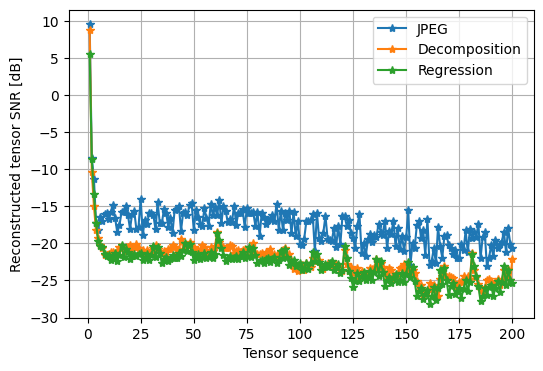

In [27]:
plt.figure(figsize=(6,4))

jpeg_group = jpeg_cha.groupby("pruning_thresh")
df_thr = jpeg_group.get_group(plot_thresh)
qual_group = df_thr.groupby("quality")
qual_key = list(qual_group.groups.keys())
df = qual_group.get_group(qual_key[plot_quality])
plt.plot(df["frame_id"],df["reconstruct_snr"],"*-",color="tab:blue", label="JPEG")

jpeg_group = decom_cha.groupby("pruning_thresh")
df_thr = jpeg_group.get_group(plot_thresh)
qual_group = df_thr.groupby("quality")
qual_key = list(qual_group.groups.keys())
df = qual_group.get_group(qual_key[plot_quality])
plt.plot(df["frame_id"],df["reconstruct_snr"],"*-",color="tab:orange", label="Decomposition")

jpeg_group = reg_cha.groupby("pruning_thresh")
df_thr = jpeg_group.get_group(plot_thresh)
qual_group = df_thr.groupby("quality")
qual_key = list(qual_group.groups.keys())
df = qual_group.get_group(qual_key[plot_quality])
plt.plot(df["frame_id"],df["reconstruct_snr"],"*-",color="tab:green", label="Regression")

plt.legend()
plt.grid()
plt.xlabel("Tensor sequence")
plt.ylabel("Reconstructed tensor SNR [dB]")
